In [1]:
#--------------------------------
## IMPORTS
#--------------------------------
import sys
import os

# set the path to find the modules
sys.path.insert(0, '../../005_src/') #use relative path
os.chdir("../../005_src")

from config import *


----------------------------------------
Packages import successful
Variables import successful
Helper Functions import successful
Functions import successful
Functions xml import successful
Functions graph import successful
Functions GCN import successful
Custom loss imported
Functions Plotting import successful
Functions Data Adjustments import successful
----------------------------------------
root directory: /storage/remote/atcremers50/ss21_multiagentcontrol/
input directory: /storage/remote/atcremers50/ss21_multiagentcontrol/004_data/
output directory: /storage/remote/atcremers50/ss21_multiagentcontrol/006_model_output/
----------------------------------------

----------------------------------------
root directory: /storage/remote/atcremers50/ss21_multiagentcontrol/
input directory: /storage/remote/atcremers50/ss21_multiagentcontrol/004_data/
output directory: /storage/remote/atcremers50/ss21_multiagentcontrol/006_model_output/
----------------------------------------



In [2]:
device = cudaOverview()

CUDA available
Number of Devices: 1
ID current Device NVIDIA GeForce GTX 1050 Ti: 0
	current GPU memory usage by tensors in bytes:0
	current GPU memory managed by caching allocator in bytes:0


In [3]:
this_date = "20210801"
ts = "13h58m33s"
GCN_num = "017"
this_GCN = f"GCN_{GCN_num}"
print (this_GCN)

from _03_Networks.GCN_017.GCN_model_017 import *
from _03_Networks.GCN_017.GCN_trainer_017 import *
from _03_Networks.GCN_017.GCN_parameters_017 import *
from _03_Networks.GCN_017.Custom_losses import *
this_GCN, ts_import = check_import()

GCN_017
at 17h51m00s imported models:
['HL03_bn']
imported parameters from: GCN_parameters_017.py at 17h51m00s
imported trainer: GCN_017 at 17h51m00s


## Reload dictionary

In [4]:
MODEL_OUTPUT_PATH = os.path.join(OUTPUT_DIR,f"{this_GCN}/")
MODEL_OUTPUT_PATH_TODAY = os.path.join(MODEL_OUTPUT_PATH,f"{this_date}-{ts}/")
print (MODEL_OUTPUT_PATH_TODAY)

/storage/remote/atcremers50/ss21_multiagentcontrol/006_model_output/GCN_017/20210801-13h58m33s/


In [5]:
dict_text_output_path = f"/storage/remote/atcremers50/ss21_multiagentcontrol/006_model_output/{this_GCN}/{this_date}-{ts}/{this_date}-{ts}_training_parameters"

reloaded_dict = pkl.load(open(f'{dict_text_output_path}.pkl',"rb"))
reloaded_dict

{'input_file_name': '20210801-08h53m15s_timesteps50000_ec3500_em7000',
 'max_num_veh': 5,
 'sim_duration_timesteps': '50000',
 'train_size': 0.8,
 'batch_size': 512,
 'Nepochs': 5000,
 'run_date': '20210801-',
 'run_time': '13h58m33s',
 'model': 'GCN_017',
 'combo': ('sum',
  512,
  'Adam',
  'L1',
  [64, 128, 256],
  0.01,
  0.6,
  0,
  'CosineAnnealingWarmRestarts',
  True,
  'leakyrelu'),
 'random_seed': 4265767,
 'save_every': 250,
 'transformstat': False,
 'plotstat': True,
 'printstat': False,
 'intentionstat': 'obsoleted',
 'use_edges_attr': True,
 'activation_function': 'leakyrelu',
 'shuttle_train_frame': 603,
 'shuttle_val_frame': 12404,
 'num_rows_training': 25664,
 'num_rows_validation': 5775,
 'num_rows_test': 642,
 'exclude_yaw': 'obsoleted',
 'concatenatestat': 'obsoleted',
 'paddingstat': 'obsoleted',
 'size_input': 4,
 'size_output': 2,
 'model_architecture': HL03_bn(
   (actfun): LeakyReLU(negative_slope=0.01)
   (conv1): GraphConv(4, 64)
   (conv2): GraphConv(64, 128

In [6]:
input_file_name = reloaded_dict["input_file_name"]
reloaded_dict["model_architecture"]

HL03_bn(
  (actfun): LeakyReLU(negative_slope=0.01)
  (conv1): GraphConv(4, 64)
  (conv2): GraphConv(64, 128)
  (conv3): GraphConv(128, 256)
  (conv4): GraphConv(256, 2)
  (bn1): GraphNorm(64)
  (bn2): GraphNorm(128)
  (bn3): GraphNorm(256)
)

## Plot losses

In [7]:
# first lossess paths

curr_epoch = 1750
tot_epoch = 5000
type_epoch = "TEMP"



In [8]:
# load losses

#if type_epoch == "TEMP":
load_path_files = os.path.join(MODEL_OUTPUT_PATH_TODAY,f"{this_date}-{ts}EPOCH_{curr_epoch}of{tot_epoch}_{type_epoch}__{type_epoch}__")
t_0_5000_path =  f"{load_path_files}training_loss.pkl"
v_0_5000_path =  f"{load_path_files}validation_loss.pkl"
lr_0_5000_path = f"{load_path_files}learning_rate.pkl"
t_losses_load = pkl.load(open(t_0_5000_path, 'rb'))
v_losses_load = pkl.load(open(v_0_5000_path, 'rb'))
lr_load = pkl.load(open(lr_0_5000_path, 'rb'))
#else: 
  # load losses
    #t_losses_load.extend(pkl.load(open( reloaded_dict['train_losses_path'], 'rb')))
    #v_losses_load.extend(pkl.load(open( reloaded_dict['val_losses_path'], 'rb')))
    #lr_load.extend(pkl.load(open( reloaded_dict['lr_path'], 'rb')))  

Plot saved in /storage/remote/atcremers50/ss21_multiagentcontrol/006_model_output/GCN_017/20210801-13h58m33s/20210801-13h58m33s_train_val_loss_plot.png


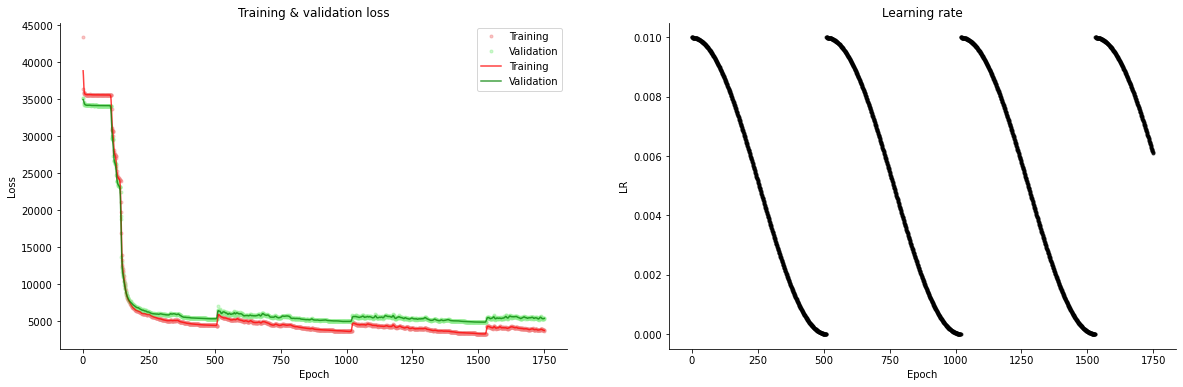

In [9]:
##================================
# TRAIN AND VAL LOSSES
##================================
fig = plot_training(t_losses_load,
                  v_losses_load,
                  learning_rate = lr_load,
                  gaussian=True,
                  sigma=2,
                  figsize=(20, 6),
                  mytitle = 'Training & validation loss'
                  )

description = f"{this_date}-{ts}"
new_png = f"{description}_train_val_loss_plot.png"
new_png_path = os.path.join(MODEL_OUTPUT_PATH_TODAY,new_png)
plt.savefig(new_png_path)
print (f"Plot saved in {new_png_path}")

In [10]:
v_losses_load.index(min(v_losses_load))

1520

In [11]:
t_losses_load.index(min(t_losses_load))

1529

## Verification
of results

In [12]:
hidden_layers_sizes = reloaded_dict["hidden_layers_sizes"]
size_input = reloaded_dict['size_input']
size_output = reloaded_dict['size_output']
random_seed = reloaded_dict["random_seed"]
activation_fun = reloaded_dict["activation_function"]

In [13]:
size_input,size_output

(4, 2)

In [14]:
##================================
## MODEL INIT
##================================
num_hidden_layers = len(hidden_layers_sizes)
    
#print (printstat)
#pdb.set_trace()
if num_hidden_layers == 3:

            hc_1 = hidden_layers_sizes[0]
            hc_2 = hidden_layers_sizes[1]
            hc_3 = hidden_layers_sizes[2]

            model = HL03_bn(
                                num_input_features=size_input,
                                num_output_features =size_output,
                                random_seed = random_seed,
                                hc_1 = hc_1,
                                hc_2 = hc_2,
                                hc_3 = hc_3,
                                activation_function = activation_fun,
                                layer_type = layer_type,
                                normalization = normalization,
                                printstat = printstat,                
                                )
load_model = model

In [15]:
load_path = reloaded_dict['model_path']
load_model.load_state_dict(torch.load(load_path))
load_model.eval()

HL03_bn(
  (actfun): LeakyReLU(negative_slope=0.01)
  (conv1): GraphConv(4, 64)
  (conv2): GraphConv(64, 128)
  (conv3): GraphConv(128, 256)
  (conv4): GraphConv(256, 2)
  (bn1): GraphNorm(64)
  (bn2): GraphNorm(128)
  (bn3): GraphNorm(256)
)

In [16]:
MODEL_OUTPUT_PATH = os.path.join(OUTPUT_DIR,f"{this_GCN}/")
MODEL_OUTPUT_PATH_DATASETS = os.path.join(MODEL_OUTPUT_PATH,f"DATASETS/")
datasets_list = sorted(glob.glob(f"{MODEL_OUTPUT_PATH_DATASETS}"+"/**/*"+f'{input_file_name}_dataset*',
                                     recursive=True))
if len( datasets_list) == 5:                               
        print ("\n> DATASETS FOUND")
        print (*datasets_list, sep = "\n")
        
        dataset_train = torch.load(datasets_list[0], map_location=torch.device('cpu') )
        # map_location=lambda storage, loc: storage.cuda(0))
        dataset_val = torch.load(datasets_list[1], map_location=torch.device('cpu') )
        dataset_test = torch.load(datasets_list[2], map_location=torch.device('cpu') )
        dataset_shuttle_train = torch.load(datasets_list[3], map_location=torch.device('cpu') )
        dataset_shuttle_val = torch.load(datasets_list[4], map_location=torch.device('cpu') )

In [17]:
path_GIF= build_gif(folder = f'/storage/remote/atcremers50/ss21_multiagentcontrol/006_model_output/GCN_{GCN_num}/{this_date}-{ts}/figures_validation_set/',
              title = "Predictions over epochs",
              search = "", 
              fps=0.5,
              recursive = True,
              delete_tempFiles = False,
              max_n_images = 200
             )

2it [00:00, 11.28it/s]

found 17 images in folder : /storage/remote/atcremers50/ss21_multiagentcontrol/006_model_output/GCN_017/20210801-13h58m33s/figures_validation_set/
the gif will be create using the first 17 images


10it [00:01,  4.52it/s]

Could not find a format to read the specified file in single-image mode


17it [00:02,  7.72it/s]


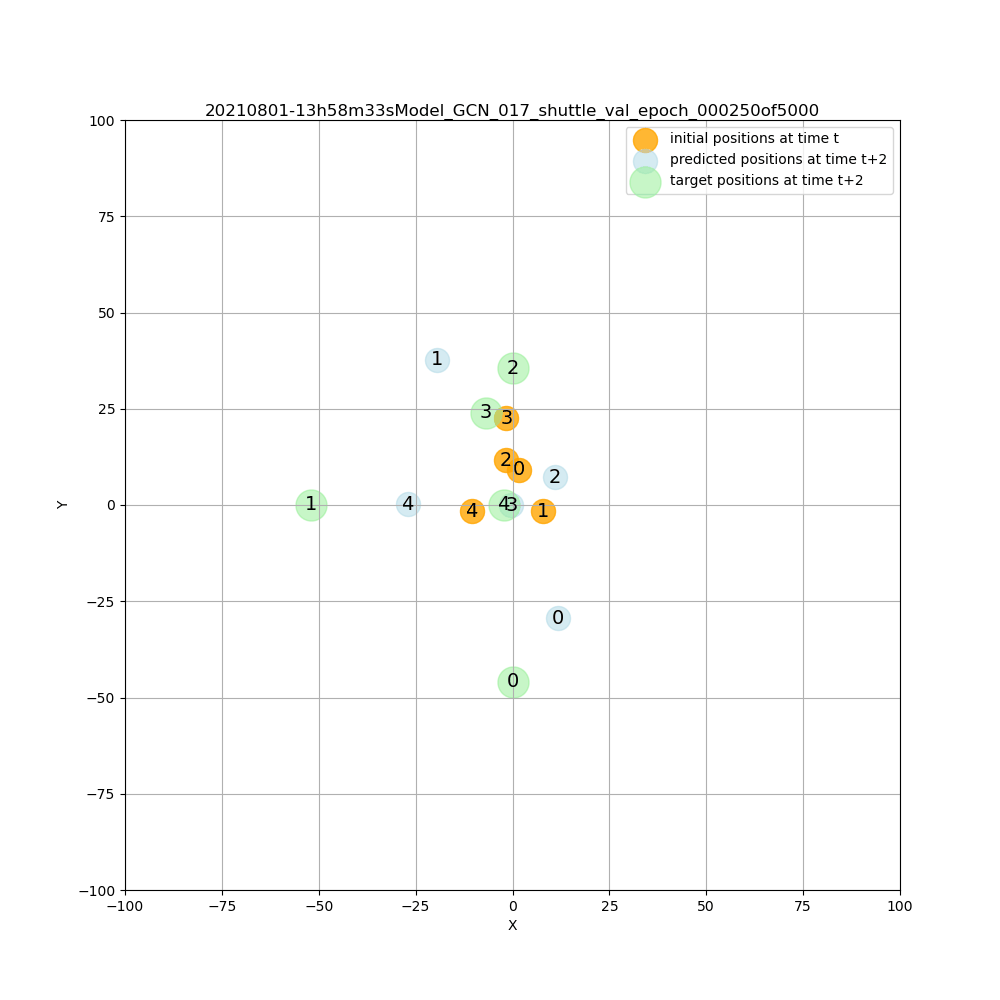

In [18]:
Image(open(f'{path_GIF}','rb').read())

In [19]:
path_GIF= build_gif(folder = f'/storage/remote/atcremers50/ss21_multiagentcontrol/006_model_output/GCN_{GCN_num}/{this_date}-{ts}/figures_training_set/',
              title = "Predictions over epochs",
              search = "", 
              fps=0.5,
              recursive = True,
              delete_tempFiles = False,
              max_n_images = 200
             )

2it [00:00, 10.92it/s]

found 17 images in folder : /storage/remote/atcremers50/ss21_multiagentcontrol/006_model_output/GCN_017/20210801-13h58m33s/figures_training_set/
the gif will be create using the first 17 images


11it [00:00, 13.14it/s]

Could not find a format to read the specified file in single-image mode


17it [00:01, 12.04it/s]


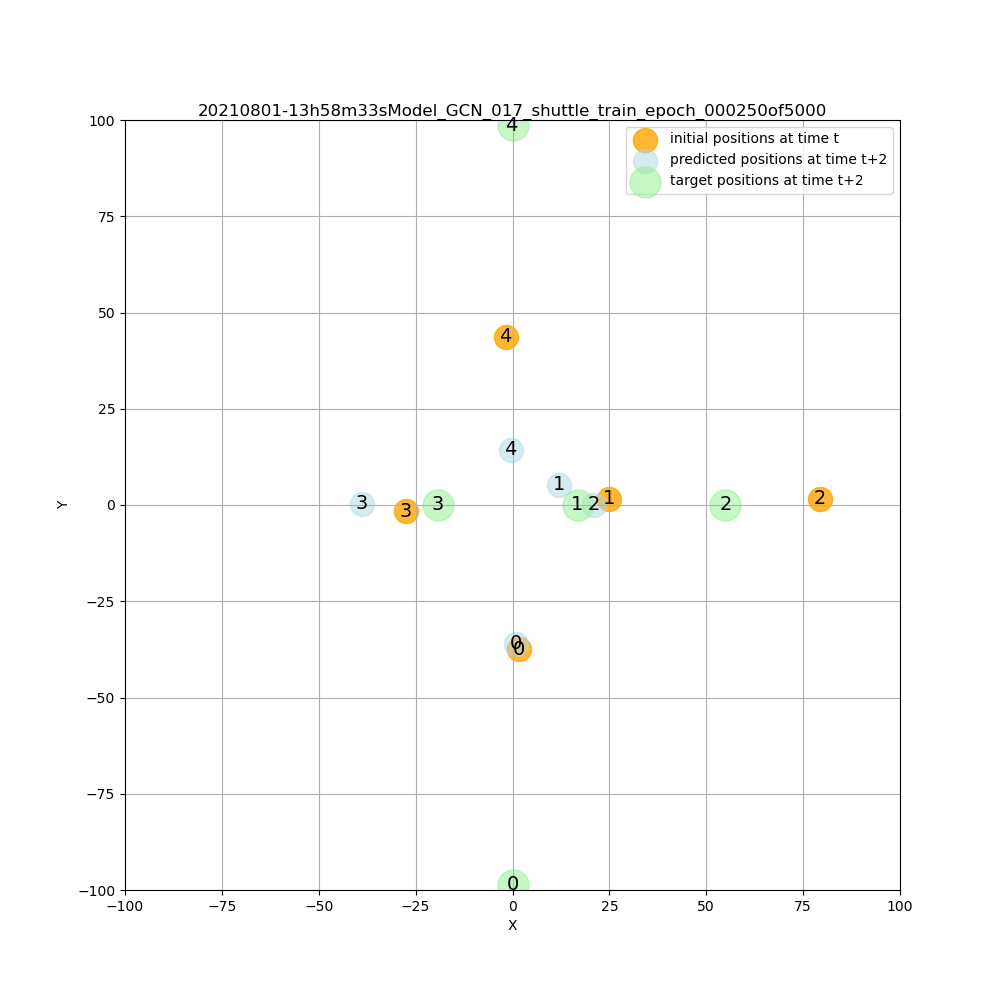

In [20]:
Image(open(f'{path_GIF}','rb').read())

In [21]:
#deleted_folders = delete_empty_r(directory= MODEL_OUTPUT_PATH,printstat = True)

## try with many different images... any difference? 

In [22]:
MODEL_OUTPUT_PATH

'/storage/remote/atcremers50/ss21_multiagentcontrol/006_model_output/GCN_017/'

In [23]:
dateset_train_path = f"{MODEL_OUTPUT_PATH}DATASETS/20210801-08h53m15s_timesteps50000_ec3500_em7000_25664_IN_data_pos_zc_data_x_speed_data_x_yaw_OUT_data_y_delta__dataset_01_train.pt"
dateset_train = torch.load(f'{dateset_train_path}')

In [24]:
dateset_train

[Data(edge_attr=[10], edge_index=[2, 10], x=[5, 4], y=[5, 2]),
 Data(edge_attr=[10], edge_index=[2, 10], x=[5, 4], y=[5, 2]),
 Data(edge_attr=[10], edge_index=[2, 10], x=[5, 4], y=[5, 2]),
 Data(edge_attr=[10], edge_index=[2, 10], x=[5, 4], y=[5, 2]),
 Data(edge_attr=[10], edge_index=[2, 10], x=[5, 4], y=[5, 2]),
 Data(edge_attr=[10], edge_index=[2, 10], x=[5, 4], y=[5, 2]),
 Data(edge_attr=[10], edge_index=[2, 10], x=[5, 4], y=[5, 2]),
 Data(edge_attr=[3], edge_index=[2, 3], x=[3, 4], y=[3, 2]),
 Data(edge_attr=[10], edge_index=[2, 10], x=[5, 4], y=[5, 2]),
 Data(edge_attr=[6], edge_index=[2, 6], x=[4, 4], y=[4, 2]),
 Data(edge_attr=[10], edge_index=[2, 10], x=[5, 4], y=[5, 2]),
 Data(edge_attr=[10], edge_index=[2, 10], x=[5, 4], y=[5, 2]),
 Data(edge_attr=[10], edge_index=[2, 10], x=[5, 4], y=[5, 2]),
 Data(edge_attr=[6], edge_index=[2, 6], x=[4, 4], y=[4, 2]),
 Data(edge_attr=[10], edge_index=[2, 10], x=[5, 4], y=[5, 2]),
 Data(edge_attr=[10], edge_index=[2, 10], x=[5, 4], y=[5, 2])

In [25]:
len(dateset_train)

25664

In [26]:
device

device(type='cuda', index=0)

In [27]:
losses = losses_results_model(
                       load_model, 
                       dateset_train,
                       device = device, #"cpu",
                       start_from = 0,
                       end_at = len(dateset_train),
                       edges_attr = True,
        
                       printstat = False,       
                       loss_stat = "L1"
                      )
print (min(losses))
print (max(losses))
print (mean(losses))

  0%|          | 0/25664 [00:00<?, ?it/s]


RuntimeError: CUDA error: CUBLAS_STATUS_NOT_INITIALIZED when calling `cublasCreate(handle)`

In [ ]:
min_ind = losses.index(min(losses))
max_ind = losses.index(max(losses))

In [ ]:
space = 100
loss = plot_results_model(
                       load_model, 
                       dateset_train,
                       start_from = min_ind,
                       end_at = min_ind+1,
                       edges_attr = True,
                       figsize = (15,15),
                       plot_input = True,
                       plot_target = True,
                       plot_prediction = True,
                       plot_intention = False, 
                       title = None,
        
                       printstat = True,       

                       xlim = (-space,space),
                       ylim = (-space,space),
                       loss_stat = "L1"
                      )

In [ ]:
space = 100
loss = plot_results_model(
                       load_model, 
                       dateset_train,
                       start_from = max_ind,
                       end_at = max_ind+1,
                       edges_attr = True,
                       figsize = (15,15),
                       plot_input = True,
                       plot_target = True,
                       plot_prediction = True,
                       plot_intention = False, 
                       title = None,
        
                       printstat = True,
                       plotstat = True,

                       xlim = (-space,space),
                       ylim = (-space,space),
                       loss_stat = "L1"
                      )

# visualize best and worst results

In [ ]:
sorted_losses = sorted(losses)

In [ ]:
k = 10
TOP_RESULTS =[losses.index(l) for l in sorted_losses[:k]]
LOWEST_RESULTS =[losses.index(l) for l in sorted_losses[-k:]]

In [ ]:
for min_ind in TOP_RESULTS:
    space = 20
    loss = plot_results_model(
                           load_model, 
                           dateset_train,
                           start_from = min_ind,
                           end_at = min_ind+1,
                           edges_attr = True,
                           figsize = (15,15),
                           plot_input = True,
                           plot_target = True,
                           plot_prediction = True,
                           plot_intention = False, 
                           title = None,

                           printstat = True,       
                           plotstat = True,
        
                           xlim = (-space,space),
                           ylim = (-space,space),
                           loss_stat = "L1"
                          )

In [ ]:
for max_ind in LOWEST_RESULTS:
    space = 100
    loss = plot_results_model(
                           load_model, 
                           dateset_train,
                           start_from = max_ind,
                           end_at = max_ind+1,
                           edges_attr = True,
                           figsize = (15,15),
                           plot_input = True,
                           plot_target = True,
                           plot_prediction = True,
                           plot_intention = False, 
                           title = None,

                           printstat = True,
                           plotstat = True,

                           xlim = (-space,space),
                           ylim = (-space,space),
                           loss_stat = "L1"
                          )